This is a piecewiese regression analysis for metaphase mitotic spindles only. **Related to figures: 2 and S2**.

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R 
library(ggplot2)

In [5]:
%%R 
setwd("/Volumes/Magdalena_NEW1/ZOO_DATA/Zoo Data/FINAL")
original.SQL<-read.csv('df2_original_for_SQL.csv',stringsAsFactors=FALSE)
original.SQL.met<-original.SQL[(original.SQL$stage == 'm' | original.SQL$stage=='mI' | original.SQL$stage=='mII'),]
original.SQL.met.mit<-original.SQL.met[which(original.SQL.met$meiotic==0),]
mitotic_df<-original.SQL.met.mit

In [7]:
%%R 
min.1<-min(mitotic_df$cell_diameter_um,na.rm = TRUE)
max.1<-max(mitotic_df$cell_diameter_um,na.rm = TRUE)
my_range<-seq(from=min.1+10,to=max.1,by=10)
print(my_range)

  [1]   14.25271   24.25271   34.25271   44.25271   54.25271   64.25271
  [7]   74.25271   84.25271   94.25271  104.25271  114.25271  124.25271
 [13]  134.25271  144.25271  154.25271  164.25271  174.25271  184.25271
 [19]  194.25271  204.25271  214.25271  224.25271  234.25271  244.25271
 [25]  254.25271  264.25271  274.25271  284.25271  294.25271  304.25271
 [31]  314.25271  324.25271  334.25271  344.25271  354.25271  364.25271
 [37]  374.25271  384.25271  394.25271  404.25271  414.25271  424.25271
 [43]  434.25271  444.25271  454.25271  464.25271  474.25271  484.25271
 [49]  494.25271  504.25271  514.25271  524.25271  534.25271  544.25271
 [55]  554.25271  564.25271  574.25271  584.25271  594.25271  604.25271
 [61]  614.25271  624.25271  634.25271  644.25271  654.25271  664.25271
 [67]  674.25271  684.25271  694.25271  704.25271  714.25271  724.25271
 [73]  734.25271  744.25271  754.25271  764.25271  774.25271  784.25271
 [79]  794.25271  804.25271  814.25271  824.25271  834.25271  84

In [13]:
%%R 
R_squares.asters<-numeric(length(my_range))

for (i in 1:length(R_squares)){  
    R_squares.asters[i]<-summary(lm(mitotic_df$spindle_length__asters_um[mitotic_df$cell_diameter_um<my_range[i]] ~ mitotic_df$cell_diameter_um[mitotic_df$cell_diameter_um<my_range[i]]))$r.squared
}
print(R_squares.asters)

  [1] 0.5346352 0.7686857 0.7506481 0.7580171 0.7466138 0.7757508 0.7929877
  [8] 0.8008486 0.7904826 0.8042822 0.8182695 0.8171832 0.7983498 0.7938191
 [15] 0.7513125 0.7307579 0.7256065 0.7236599 0.7203097 0.7153950 0.7224118
 [22] 0.7270361 0.7266951 0.7214314 0.7199120 0.7243042 0.7259995 0.7270046
 [29] 0.7270046 0.7254171 0.7254171 0.7256815 0.7262430 0.7260879 0.7283608
 [36] 0.7269624 0.7269624 0.7269624 0.7269624 0.7269624 0.7269624 0.7269624
 [43] 0.7269624 0.7269624 0.7269624 0.7269624 0.7269624 0.7154912 0.7095492
 [50] 0.7095492 0.7095492 0.7095492 0.7095492 0.7095492 0.7095492 0.7095492
 [57] 0.6874276 0.6874276 0.6874276 0.6874276 0.6874276 0.6874276 0.6712999
 [64] 0.6712999 0.6712999 0.6712999 0.6532334 0.6532334 0.6532334 0.6532334
 [71] 0.6532334 0.6532334 0.6532334 0.6414029 0.6414029 0.6414029 0.6414029
 [78] 0.6414029 0.6414029 0.6414029 0.6414029 0.6414029 0.6414029 0.6414029
 [85] 0.6414029 0.6414029 0.6414029 0.6414029 0.6414029 0.6414029 0.6414029
 [92] 0.6414

In [14]:
%%R 
R_squares.poles<-numeric(length(my_range))

for (i in 1:length(R_squares)){  
    R_squares.poles[i]<-summary(lm(mitotic_df$spindle_length_poles_um[mitotic_df$cell_diameter_um<my_range[i]] ~ mitotic_df$cell_diameter_um[mitotic_df$cell_diameter_um<my_range[i]]))$r.squared
}
print(R_squares.poles)

  [1] 0.2134471 0.5396314 0.5176443 0.5358997 0.5108425 0.5599986 0.6070198
  [8] 0.6284176 0.6227363 0.6463128 0.6782956 0.6847934 0.6726606 0.6771993
 [15] 0.6457035 0.6362719 0.6350007 0.6278142 0.6335934 0.6279914 0.6296932
 [22] 0.6332014 0.6292011 0.6290680 0.6340304 0.6411864 0.6473071 0.6514163
 [29] 0.6514163 0.6523341 0.6523341 0.6551281 0.6577498 0.6607854 0.6663605
 [36] 0.6693935 0.6693935 0.6693935 0.6693935 0.6693935 0.6693935 0.6693935
 [43] 0.6693935 0.6693935 0.6693935 0.6693935 0.6693935 0.6622599 0.6546795
 [50] 0.6546795 0.6546795 0.6546795 0.6546795 0.6546795 0.6546795 0.6546795
 [57] 0.6405514 0.6405514 0.6405514 0.6405514 0.6405514 0.6405514 0.6284991
 [64] 0.6284991 0.6284991 0.6284991 0.6167738 0.6167738 0.6167738 0.6167738
 [71] 0.6167738 0.6167738 0.6167738 0.6065791 0.6065791 0.6065791 0.6065791
 [78] 0.6065791 0.6065791 0.6065791 0.6065791 0.6065791 0.6065791 0.6065791
 [85] 0.6065791 0.6065791 0.6065791 0.6065791 0.6065791 0.6065791 0.6065791
 [92] 0.6065

In [ ]:
%%R 
get_vec_or_Rsq<-function(sp_length,c_diameter,vector_of_c_limits){
  R_squares<-numeric(length(vector_of_c_limits))
  
  for (i in 1:length(R_squares)){
    R_squares[i]<-summary(lm(sp_length[c_diameter<vector_of_c_limits[i]] ~ c_diameter[c_diameter<vector_of_c_limits[i]]))$r.squared
  } 
  
  return(R_squares)
}

In [17]:
%%R 
print(max(R_squares.asters))
print(max(R_squares.poles))


print(my_range[which(R_squares.asters==max(R_squares.asters))])
print(my_range[which(R_squares.poles==max(R_squares.poles))])

[1] 0.8182695
[1] 0.6847934
[1] 114.2527
[1] 124.2527


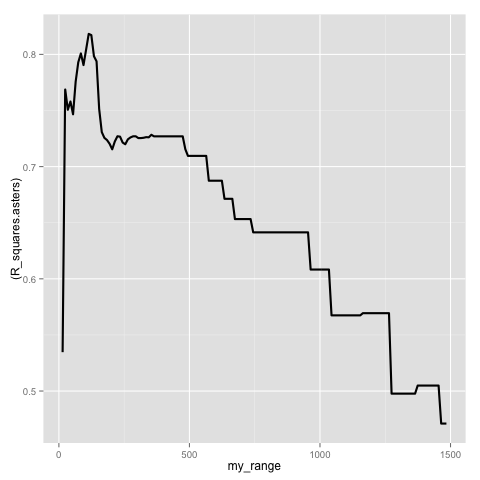

In [21]:
%%R
ggplot(data=as.data.frame(cbind(my_range,R_squares.asters)))+geom_line(aes(x=my_range,y=(R_squares.asters)),size=1)


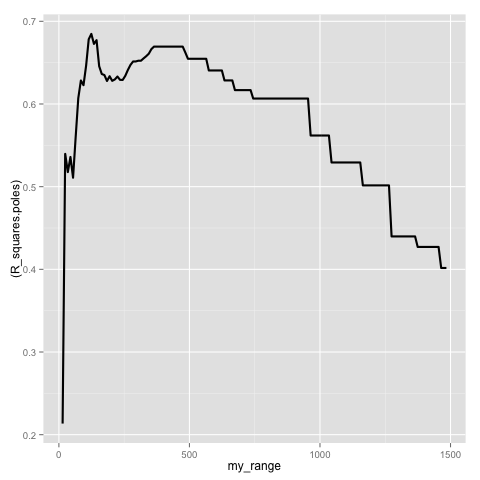

In [22]:
%%R
ggplot(data=as.data.frame(cbind(my_range,R_squares.poles)))+geom_line(aes(x=my_range,y=(R_squares.poles)),size=1)